# EDA in Fifa 23 - Ultimate team Dataset
*EDA - Exploratory Data Analysys*

## Context
In Fifa 23, the Ultimate Team game mode allows players to build teams using "cards" representing real-life players, with multiple versions available.

Every month, new campaigns are launched by developers with updated player versions to enhance team performance. 

## Goal
The goal of this notebook is to load, cleaning and analyze the dataset.

## The data
The data was obtained by scraping information from the website Futbin.com, purely for study purposes.

### Explaning the data:

- Name: Name of player
- Team: Team of player
- Country: Country of player
- League: League of player
- Rating: Overall rating of player, using the stats to calculate the overall
- Rare: The lever of rarity of player, could be Rare or Non-rare
- Version Color: Version of card's player
- Position: Main position of player
- Other position: Variaty of position that player can play
- Version: The campaign version of this card
- Run type: Type of running, differs in game
- Price: Price of this card when the data was extracted
- Skill: Skill moves, the ability of execute some dribles
- Weak foot: The ability of using the weak foot.
- Attack rate: The ability of going to attack
- Defense rate: The ability of going to defense
- Pace: Ability to run (0 - 100)
- Shoot: Ability to shoot (0 - 100)
- Pass: Ability to pass (0 - 100)
- Drible: Ability to drible/ agility (0 - 100)
- Defense: Ability to execute defensive moves (0 - 100)
- Physical: Physical ability (0 - 100)
- Body type: Type of body, some players have a unique body type
- Height (cm): Player's Height in centimeters
- Weight (kg): Player's weight in kilograms
- Popularity: Upvotes/ feedbak of players in Futbin website
- Base stats: Stats considering Pace, Shoot, Pass, Drible, Defense and Physical
- In game stats: Stats considering all atributes and player's behaviour in game
- Game version: Ultimate team version
- Updated at: Date of extraction

# Step 1 - Import Libs, load data and a overview on Dataframe
The first step is import the libs that we'll use in this project.

We should load the data from a local file (csv) and store it in a dataframe.

After that, we should take a look on the dataset, check their dataypes, the size and etc.

In [46]:
import pandas as pd
import re
import matplotlib.pylab as plt
import seaborn as sns
import numpy as np

# define style for charts
plt.style.use('ggplot')

# expand number of columns to better viz
pd.set_option('display.max_columns', 50)

%load_ext nb_black

df_players = pd.read_csv("data/players.csv")

The nb_black extension is already loaded. To reload it, use:
  %reload_ext nb_black


<IPython.core.display.Javascript object>

In [47]:
# check the size of dataset (rows, columns)
df_players.shape

(4020, 30)

<IPython.core.display.Javascript object>

In [48]:
# check 10 random samples of dataset
df_players.sample(10)

,Name,Team,Country,League,Rating,Rare,Version_color,Position,Other_Positions,Version,Run_type,Price,Skill,Weak_foot,Attack_rate,Defense_rate,Pace,Shoot,Pass,Drible,Defense,Physical,Body_type,Height_cm,Weight (kg),Popularity,Base_Stats,In_Game_Stats,Game_version,Updated_at
3749,Darío Benedetto,Boca Juniors,Argentina,CONMEBOL Libertadores,77,rare,libertadores_b gold,ST,CF,NaN,Controlled,750,3,3,M,M,75,79,69,75,38,70,Average,177.0,75.0,9,406,1995,FIFA 23,2023-04-17
2222,Ulisses Garcia,BSC Young Boys,Switzerland,Raiffeisen Super L. (SUI 1),82,rare,if gold,LB,"LWB,LM",IF,Controlled,11K,3,3,H,M,90,54,74,80,78,86,Average,183.0,82.0,38,462,2085,FIFA 23,2023-04-17
3522,Aymen Barkok,Morocco,Morocco,World Cup,78,rare,wc_player gold,CAM,"CM,CF",World Cup Player,Controlled,0,4,3,H,M,81,70,73,83,59,69,High & Average+,189.0,82.0,1,435,2013,FIFA 23,2023-04-17
2040,Matias Vecino,SS Lazio,Uruguay,Serie A TIM,83,rare,if gold,CDM,CM,IF,Controlled,11.5K,3,3,H,M,70,77,80,82,82,83,High & Average+,187.0,81.0,2,474,2259,FIFA 23,2023-04-17
3259,Jiří Pavlenka,Werder Bremen,Czech Republic,Bundesliga,78,non-rare,gold,GK,NaN,NaN,Controlled,700,1,3,M,M,81,74,60,84,36,69,High & Average,196.0,81.0,15,404,730,FIFA 23,2023-04-17
1688,Pedro David Rosendo Marques,NEC Nijmegen,Portugal,Eredivisie,84,rare,objective_reward_3 gold,ST,CF,Squad Foundation,Controlled,0,4,4,H,M,88,84,70,83,40,82,Average,181.0,77.0,281,447,2160,FIFA 23,2023-04-17
2002,Pepe Reina,Villarreal CF,Spain,LaLiga Santander,83,rare,if gold,GK,NaN,IF,Controlled,11.25K,1,3,M,M,82,83,85,83,52,86,Unique,188.0,92.0,69,471,1003,FIFA 23,2023-04-17
2309,Neto,AFC Bournemouth,Brazil,Premier League,81,rare,gold,GK,NaN,NaN,Controlled,700,1,2,M,M,82,78,77,80,54,78,High & Average+,190.0,84.0,56,449,992,FIFA 23,2023-04-17
1852,Samuel Chukwueze,Villarreal CF,Nigeria,LaLiga Santander,84,rare,if gold,RW,RM,IF,Explosive,12K,4,2,H,L,93,80,77,89,41,70,Average,172.0,70.0,47,450,2092,FIFA 23,2023-04-17
3323,Rezaei,Iran,Iran,World Cup,78,rare,wc_player gold,ST,CF,World Cup Player,Controlled,0,3,4,H,H,74,77,70,73,33,77,High & Average,185.0,79.0,4,404,1951,FIFA 23,2023-04-17


<IPython.core.display.Javascript object>

In [49]:
# check the name and the type of each column, and if there is some missing values
df_players.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4020 entries, 0 to 4019
Data columns (total 30 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             4020 non-null   object 
 1   Team             4020 non-null   object 
 2   Country          4020 non-null   object 
 3   League           4020 non-null   object 
 4   Rating           4020 non-null   int64  
 5   Rare             4020 non-null   object 
 6   Version_color    4020 non-null   object 
 7   Position         4020 non-null   object 
 8   Other_Positions  2986 non-null   object 
 9   Version          3346 non-null   object 
 10  Run_type         4020 non-null   object 
 11  Price            4020 non-null   object 
 12  Skill            4020 non-null   int64  
 13  Weak_foot        4020 non-null   int64  
 14  Attack_rate      4020 non-null   object 
 15  Defense_rate     4020 non-null   object 
 16  Pace             4020 non-null   int64  
 17  Shoot         

<IPython.core.display.Javascript object>

# Step 2 - Data preparation
In this step we prepare the data for further analysis, it's included:
- 2.1 Normalize the column name
- 2.2 Normalize the prices
- 2.3 Adjust the data types
- 2.4 Deal with whitespace
- 2.5 Deal with missing values 
- 2.6 Deal with duplicated values
- 2.7 Remove useless data

## 2.1 Normalize column name
The data set has a pattern in the column names, but it's easier to manipulate if they are with no space and lowercase, so let's implement this simple fix.

In [50]:
columns = df_players.columns.str.replace(" ", "_")\
                            .str.replace("(", "")\
                            .str.replace(")", "")\
                            .str.lower()

df_players.columns = list(columns)

C:\Users\Felipe Mayer\AppData\Local\Temp\ipykernel_36912\2323474123.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  .str.replace("(", "")\
C:\Users\Felipe Mayer\AppData\Local\Temp\ipykernel_36912\2323474123.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  .str.replace(")", "")\


<IPython.core.display.Javascript object>

## 2.2 Normalize the price
The column price, as you may notice, is a Object, it means, a string. We'll use this column to some analysis so it's crucial to change them to a numeric value and normalize it.

The numbers are expressed with K for thousand and M to million, for exemple 14.000 it's 14K. So we need to change the letter (K or M) to correspodent 0's (000 and 000000). After that, change the datatype to integer.

In [51]:
df_players['price'] = df_players['price'].replace({'M': 'e+06', 'K': 'e+03'}, regex=True).astype(float).astype(np.int64)

df_players['price']

0        3980000
1        4820000
2        2230000
3       11400000
4        2500000
          ...   
4015           0
4016           0
4017           0
4018           0
4019           0
Name: price, Length: 4020, dtype: int64

<IPython.core.display.Javascript object>

## 2.3 Adjust the Data type

As you may notice, the dataset loaded has a good data type definition, excepts for "updated_at" column, it's a Object but it's a date, so we need to change it's data type.

In [52]:
df_players['updated_at'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 4020 entries, 0 to 4019
Series name: updated_at
Non-Null Count  Dtype 
--------------  ----- 
4020 non-null   object
dtypes: object(1)
memory usage: 31.5+ KB


<IPython.core.display.Javascript object>

In [53]:
df_players['updated_at'] = df_players['updated_at'].astype('datetime64[ns]')

df_players['updated_at'].sample(5)

2337   2023-04-17
1753   2023-04-17
965    2023-04-17
970    2023-04-17
3031   2023-04-17
Name: updated_at, dtype: datetime64[ns]

<IPython.core.display.Javascript object>

## 2.4 Deal with whitespace

Some data has whitespace, since the data was scrapped so we need to remove it. To make it easier we will remove the whitespace of every String column, even if it doens't needed

In [54]:
for col in df_players.columns:
    if df_players[col].dtype == 'object':
        df_players[col] = df_players[col].str.strip()

<IPython.core.display.Javascript object>

## 2.5 Deal with missing values 
There is some columns with missing values, let's deal with deal properly.

- For "version" column, we need to understand which players without a version and why, so we can deal with that.
- For "height" and "weight" columns, we need to understand below what's happen and choose the best way to deal it.
- For "body_type" column, there is a patter to define the body type of player, we can user it to fill the null values.

In [55]:
df_players.isna().sum()

name                  0
team                  0
country               0
league                0
rating                0
rare                  0
version_color         0
position              0
other_positions    1034
version             674
run_type              0
price                 0
skill                 0
weak_foot             0
attack_rate           0
defense_rate          0
pace                  0
shoot                 0
pass                  0
drible                0
defense               0
physical              0
body_type            17
height_cm             2
weight_kg            17
popularity            0
base_stats            0
in_game_stats         0
game_version          0
updated_at            0
dtype: int64

<IPython.core.display.Javascript object>

### 2.5.1 Column: "version"
Some players without 'version' filled, but they belong to sub-groups with same 'version_color'. We'll use the 'version-color' information to fill the 'version' missing value columns.

In [56]:
df_players[df_players['version_color'].isin(df_players[df_players['version'].isna()]\
                                            ['version_color'].unique())]\
                                            [['version', 'version_color' ]]\
                                            .value_counts(dropna=False)

version       version_color      
NaN           gold                   640
Normal        gold                   280
Rare          gold                    87
non-rare      gold                    27
NaN           bd_icon gold            18
              libertadores_b gold     15
Non-Rare      gold                     7
Libertadores  libertadores_b gold      1
SBC           bd_icon gold             1
NaN           sudamericana gold        1
dtype: int64

<IPython.core.display.Javascript object>

In [57]:
df_players['version'] = df_players['version'].fillna(df_players['version_color'])

<IPython.core.display.Javascript object>

In [58]:
df_players['version'].isna().sum()

0

<IPython.core.display.Javascript object>


### 2.5.2 Deal with "height" and "weight" columns

Some players has 0 as weight, let's change it to NaN and deal with them.

In [59]:
df_players['weight_kg'].replace(0, np.nan, inplace=True)

<IPython.core.display.Javascript object>

There is a correlation between height and weight, so we'll fill the missing values of 'weight' with the avarage value of other players with same "height"

In [60]:
# check the correlation between height and weight
df_players['height_cm'].corr(df_players['weight_kg'])

0.7697453215779397

<IPython.core.display.Javascript object>

In [61]:
# group by height and calculate the mean of weight
df_player_groupedby_height = df_players[df_players['weight_kg'].notnull()].groupby('height_cm')['weight_kg'].mean()

df_player_groupedby_height.sample(n=5)

height_cm
184.0    77.854545
173.0    69.648855
171.0    67.323077
195.0    90.094340
165.0    62.000000
Name: weight_kg, dtype: float64

<IPython.core.display.Javascript object>

Using the height grouped dataframe above to fill the missing values of weight

In [62]:
df_players['weight_kg'] = df_players['weight_kg'].fillna(df_players['height_cm'].map(df_player_groupedby_height))

df_players[df_players['weight_kg'].isna()]

,name,team,country,league,rating,rare,version_color,position,other_positions,version,run_type,price,skill,weak_foot,attack_rate,defense_rate,pace,shoot,pass,drible,defense,physical,body_type,height_cm,weight_kg,popularity,base_stats,in_game_stats,game_version,updated_at
89,Casillas Fernández,FUT ICONS,Spain,Icons,93,rare,trophy_titans_icon gold,GK,NaN,Trophy Titans - ICON,Controlled,99000,1,3,M,M,94,91,87,96,62,92,NaN,NaN,NaN,1189,522,1359,FIFA 23,2023-04-17
137,Casillas Fernández,FUT ICONS,Spain,Icons,92,rare,icon gold,GK,NaN,Icon,Controlled,145000,1,3,M,M,93,89,85,95,60,91,NaN,NaN,NaN,216,513,1355,FIFA 23,2023-04-17


<IPython.core.display.Javascript object>

Two entries still empty in terms of height weight and body type. The player is Casillas, he had more versions and only this two don't have this information, so we sould add it manually.

In [63]:
# find all entries with name Casillas
df_casillas = df_players[df_players['name'].str.contains('Casillas')]

# get the height mean of all Casillas (not null)   
height_mean = df_casillas[df_casillas['height_cm'].notnull()]['height_cm'].mean()

# get the weight mean of all Casillas (not null)
weight_mean = df_casillas[df_casillas['weight_kg'].notnull()]['weight_kg'].mean()

# get Casillas body_type information   
body_type = df_casillas[df_casillas['body_type'].notnull()]['body_type'].unique()

<IPython.core.display.Javascript object>

In [64]:
# replace miss values of Casillas with the mean of height and weight
df_players.loc[df_players['name'].str.contains('Casillas'), 'height_cm'] = df_players.loc[df_players['name'].str.contains('Casillas'), 'height_cm'].fillna(height_mean).round(1)
df_players.loc[df_players['name'].str.contains('Casillas'), 'weight_kg'] = df_players.loc[df_players['name'].str.contains('Casillas'), 'weight_kg'].fillna(weight_mean).round(1)

# fill na value of Casillas body_type with the most common value
df_players.loc[df_players['name'].str.contains('Casillas'), 'body_type'] = df_players.loc[df_players['name'].str.contains('Casillas'), 'body_type'].fillna(body_type[0])

# find all entries with name Casillas
df_players[df_players['name'].str.contains('Casillas')][['name', 'body_type', 'height_cm', 'weight_kg']]

,name,body_type,height_cm,weight_kg
89,Casillas Fernández,Average,185.0,77.4
137,Casillas Fernández,Average,185.0,77.4
234,Iker Casillas,Average,185.0,78.2
474,Iker Casillas,Average,185.0,84.0
906,Iker Casillas,Average,185.0,70.0


<IPython.core.display.Javascript object>

In [65]:
# show players with null values in any column
df_players.isna().sum()

name                  0
team                  0
country               0
league                0
rating                0
rare                  0
version_color         0
position              0
other_positions    1034
version               0
run_type              0
price                 0
skill                 0
weak_foot             0
attack_rate           0
defense_rate          0
pace                  0
shoot                 0
pass                  0
drible                0
defense               0
physical              0
body_type            15
height_cm             0
weight_kg             0
popularity            0
base_stats            0
in_game_stats         0
game_version          0
updated_at            0
dtype: int64

<IPython.core.display.Javascript object>

### 2.5.3 Deal with 'body_type' column

The idea is to use the Height and Weight to define the body type that are missing. We used BMI (body mass index) to define the boundaries.

For this column it's ok if we aren't 100% sure about the value.

In [66]:
#create a new column BMI (body mass index) bmi = weight / (height ** 2)
df_players['bmi'] = (df_players['weight_kg'] / (df_players['height_cm']/100) ** 2).round(0)

df_players[['weight_kg', 'height_cm', 'bmi']].sample(5)

,weight_kg,height_cm,bmi
2277,82.0,188.0,23.0
1736,76.0,180.0,23.0
3040,81.0,193.0,22.0
2103,67.0,172.0,23.0
11,92.0,193.0,25.0


<IPython.core.display.Javascript object>

In [67]:
# group by body_type and calculate the mean of bmi
df_player_groupedby_body_type = df_players.groupby('body_type')['bmi'].mean().round(0)

# create a dict based on groups
dict_bmi_bodytype = {v: k for k, v in df_player_groupedby_body_type.items()}

dict_bmi_bodytype

{23.0: 'Unique',
 22.0: 'Short & Lean',
 24.0: 'Ronaldinho',
 21.0: 'High & Lean',
 25.0: 'Stocky'}

<IPython.core.display.Javascript object>

In [68]:
# fill na values of body_type with dictionary
df_players['body_type'] = df_players['body_type'].fillna(df_players['bmi'].map(dict_bmi_bodytype))

<IPython.core.display.Javascript object>

In [69]:
df_players.isna().sum()

name                  0
team                  0
country               0
league                0
rating                0
rare                  0
version_color         0
position              0
other_positions    1034
version               0
run_type              0
price                 0
skill                 0
weak_foot             0
attack_rate           0
defense_rate          0
pace                  0
shoot                 0
pass                  0
drible                0
defense               0
physical              0
body_type             0
height_cm             0
weight_kg             0
popularity            0
base_stats            0
in_game_stats         0
game_version          0
updated_at            0
bmi                   0
dtype: int64

<IPython.core.display.Javascript object>

There is some missing values on "other_positions" column, but it's not a problem since not every players will have more than one position to play. 

## 2.6 Duplicated values
Some players has more than one version, and it's fine, but we should understand if some players has the same Name, Team, Rating, Version and Position. 

In [73]:
df_players.loc[df_players.duplicated(subset=['name',
                                             'team', 
                                            'rating',
                                            'league',
                                            'version',
                                            'position'], keep=False)]

,name,team,country,league,rating,rare,version_color,position,other_positions,version,run_type,price,skill,weak_foot,attack_rate,defense_rate,pace,shoot,pass,drible,defense,physical,body_type,height_cm,weight_kg,popularity,base_stats,in_game_stats,game_version,updated_at,bmi
402,Oleksandr Zinchenko,Arsenal,Ukraine,Premier League,90,rare,fut-bd gold,LB,LWB,FUT Birthday,Controlled,258000,5,4,H,M,90,78,89,90,87,81,Lean,175.0,64.0,903,515,2486,FIFA 23,2023-04-17,21.0
403,Oleksandr Zinchenko,Arsenal,Ukraine,Premier League,90,rare,fut-bd gold,LB,LWB,FUT Birthday,Controlled,255000,4,5,H,M,90,78,89,90,87,81,Lean,175.0,64.0,621,515,2486,FIFA 23,2023-04-17,21.0
570,Darwin Núñez,Liverpool,Uruguay,Premier League,89,rare,fut-bd gold,LW,"CF,ST",FUT Birthday,Controlled,400000,4,5,H,H,95,88,77,86,48,92,High & Average+,186.0,80.0,1099,486,2305,FIFA 23,2023-04-17,23.0
571,Darwin Núñez,Liverpool,Uruguay,Premier League,89,rare,fut-bd gold,LW,"CF,ST",FUT Birthday,Controlled,415000,5,4,H,H,95,88,77,86,48,92,High & Average+,186.0,80.0,821,486,2305,FIFA 23,2023-04-17,23.0
665,David Alaba,Real Madrid,Austria,LaLiga Santander,88,rare,halloween gold,CB,NaN,Rulebreakers,Controlled,0,3,4,M,M,81,66,85,83,91,81,Average,180.0,78.0,-773,487,2360,FIFA 23,2023-04-17,24.0
666,David Alaba,Real Madrid,Austria,LaLiga Santander,88,rare,halloween gold,CB,NaN,Rulebreakers,Controlled,0,3,4,M,M,81,66,85,83,87,87,Average,180.0,78.0,2872,489,2367,FIFA 23,2023-04-17,24.0
817,Jorge Resurrección,Atlético de Madrid,Spain,LaLiga Santander,88,rare,fut-bd gold,CM,CDM,FUT Birthday,Controlled,35000,4,5,M,M,80,81,90,85,83,84,Average,176.0,77.0,-77,503,2410,FIFA 23,2023-04-17,25.0
818,Jorge Resurrección,Atlético de Madrid,Spain,LaLiga Santander,88,rare,fut-bd gold,CM,CDM,FUT Birthday,Controlled,34750,5,4,M,M,80,81,90,85,83,84,Average,176.0,77.0,200,503,2410,FIFA 23,2023-04-17,25.0
828,Mattéo Guendouzi,OM,France,Ligue 1,88,rare,fut-bd gold,CM,CDM,FUT Birthday,Controlled,378000,5,4,M,H,83,82,87,84,86,89,High & Average+,185.0,68.0,752,511,2445,FIFA 23,2023-04-17,20.0
829,Mattéo Guendouzi,OM,France,Ligue 1,88,rare,fut-bd gold,CM,CDM,FUT Birthday,Controlled,357000,4,5,M,H,83,82,87,84,86,89,High & Average+,185.0,68.0,540,511,2445,FIFA 23,2023-04-17,20.0


<IPython.core.display.Javascript object>

In [76]:
# drop duplicated values
df_players.drop_duplicates(subset=['name',
                                            'team', 
                                            'rating',
                                            'league',
                                            'version',
                                            'position'], 
                                            keep='first', inplace=True)

df_players.shape

(4011, 31)

<IPython.core.display.Javascript object>

## 2.7 Remove useless data

Some entries are useless to the analysis so we sould remove it.

### 2.7.1 World Cup players
For the purposes of this analysis, we will exclude two special versions of player cards: "World Cup Player",

In [83]:
df_players = df_players.query('version != "World Cup Player"')
df_players.shape

(2899, 31)

<IPython.core.display.Javascript object>

### 2.7.2 Keep players with high rating
Choosing players who have a rating of 83 or higher. For those below 83 the price is almost the same

In [85]:
df_players = df_players.loc[df_players['rating'] >= 84]\
                                .reset_index(drop=True)\
                                .copy()

df_players.shape

(1722, 31)

<IPython.core.display.Javascript object>

### 2.7.3 Players with 0 price
Some players doen't have a price, so we need to remove then to don't misleading the analysis.

In [93]:
# remove players with price == 0
df_players = df_players[df_players['price'] != 0].reset_index(drop=True).copy()

df_players.shape

(1579, 31)

<IPython.core.display.Javascript object>

# WIP

## Step 3 - Feature Understanding

In [86]:
df_players['league'].value_counts(normalize=True)

Icons                          0.232288
Premier League                 0.204994
LaLiga Santander               0.132404
Serie A TIM                    0.126597
Bundesliga                     0.112079
Ligue 1                        0.086527
Major League Soccer            0.027294
Eredivisie                     0.020906
Liga NOS (POR 1)               0.014518
MBS Pro League (SAU 1)         0.010453
Süper Lig (TUR 1)              0.009292
World Cup                      0.004065
Scottish Premiership (SPFL)    0.003484
CONMEBOL Libertadores          0.002904
1A Pro League (BEL 1)          0.002904
EFL Championship (ENG 2)       0.002904
Raiffeisen Super L. (SUI 1)    0.001161
Bundesliga 2 (GER 2)           0.001161
Polski Ekstraklasa (POL 1)     0.000581
Liga Hrvatska (CRO 1)          0.000581
Chinese FA Super L. (CHN 1)    0.000581
A-League (AUS 1)               0.000581
EFL League One (ENG 3)         0.000581
LaLiga SmartBank (ESP 2)       0.000581
Ukrayina Liha (UKR 1)          0.000581


<IPython.core.display.Javascript object>

In [54]:
top_10_leagues = df_players['league'].value_counts().head(10)

df_top_league_players = df_players.loc[df_players['league'].isin(top_10_leagues.index)]

<IPython.core.display.Javascript object>

In [55]:
top_10_leagues

Premier League            353
LaLiga Santander          228
Serie A TIM               218
Bundesliga                192
Ligue 1                   149
Major League Soccer        47
Eredivisie                 36
Liga NOS (POR 1)           25
MBS Pro League (SAU 1)     18
Süper Lig (TUR 1)          16
Name: league, dtype: int64

<IPython.core.display.Javascript object>

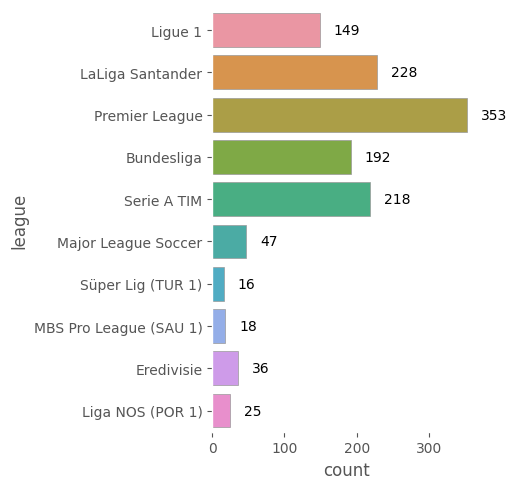

<IPython.core.display.Javascript object>

In [56]:
g = sns.catplot(
    data=df_top_league_players, y="league", kind="count", edgecolor=".6",
)

ax = g.facet_axis(0, 0)

plt.grid(False)

ax.set(facecolor = "white")

for c in ax.containers:
    labels = [(round(v.get_width())) for v in c]
    ax.bar_label(c, labels=labels, label_type='edge', padding=10, color='black')

In [57]:
df_top_league_players['country'].value_counts(normalize=True)

France        0.102964
England       0.096724
Spain         0.080343
Germany       0.074103
Brazil        0.072543
                ...   
Suriname      0.000780
Armenia       0.000780
Mozambique    0.000780
Uzbekistan    0.000780
Greece        0.000780
Name: country, Length: 67, dtype: float64

<IPython.core.display.Javascript object>

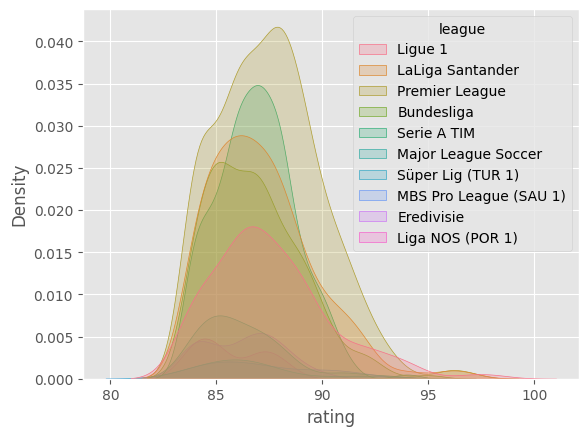

<IPython.core.display.Javascript object>

In [58]:
ax = sns.kdeplot(data=df_top_league_players, x="rating", hue='league', 
                                                warn_singular=False,
                                                fill=True
                                                )
plt.setp(ax.get_legend().get_texts(), color='black')
plt.setp(ax.get_legend().get_title(), color='black')

plt.show()

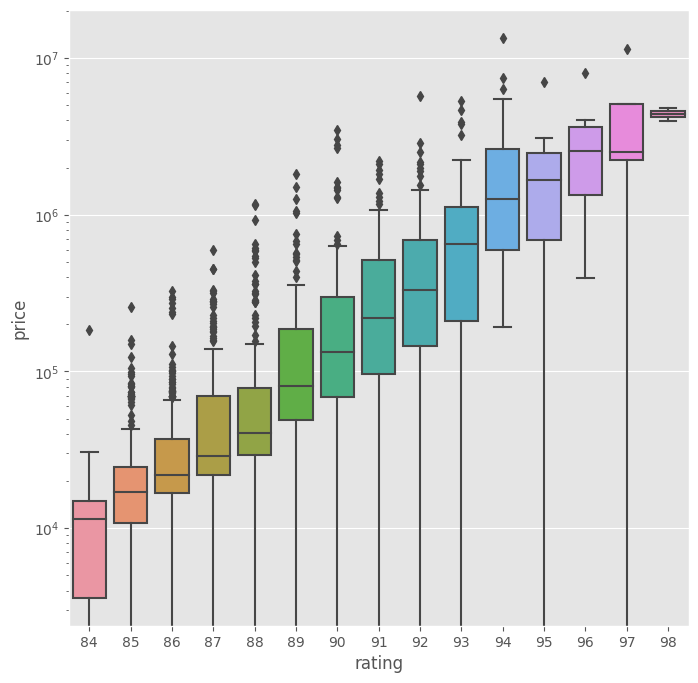

<IPython.core.display.Javascript object>

In [91]:
f, ax = plt.subplots(figsize=(8, 8))
ax.set_yscale("log")
f = sns.boxplot(x='rating',y='price', data=df_players.query('price > 0'))


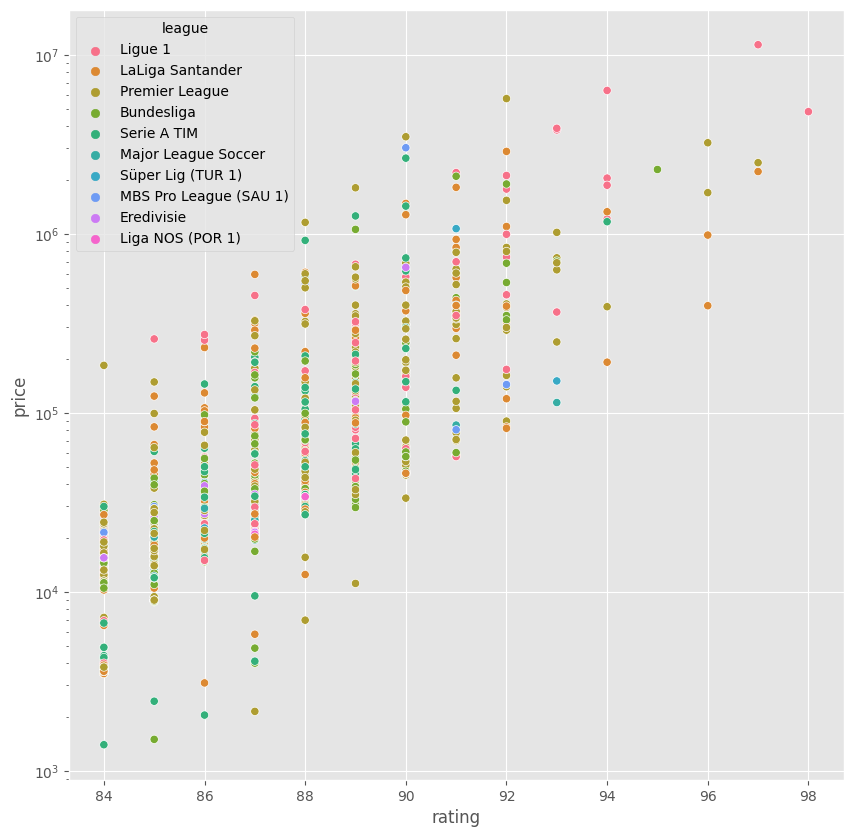

<IPython.core.display.Javascript object>

In [60]:
ax = plt.subplots(figsize=(10, 10))

ax = sns.scatterplot(data=df_top_league_players,
                        y='price',
                        x='rating',
                        hue='league')

ax.set_yscale("log")

plt.setp(ax.get_legend().get_texts(), color='black')
plt.setp(ax.get_legend().get_title(), color='black')

plt.show()

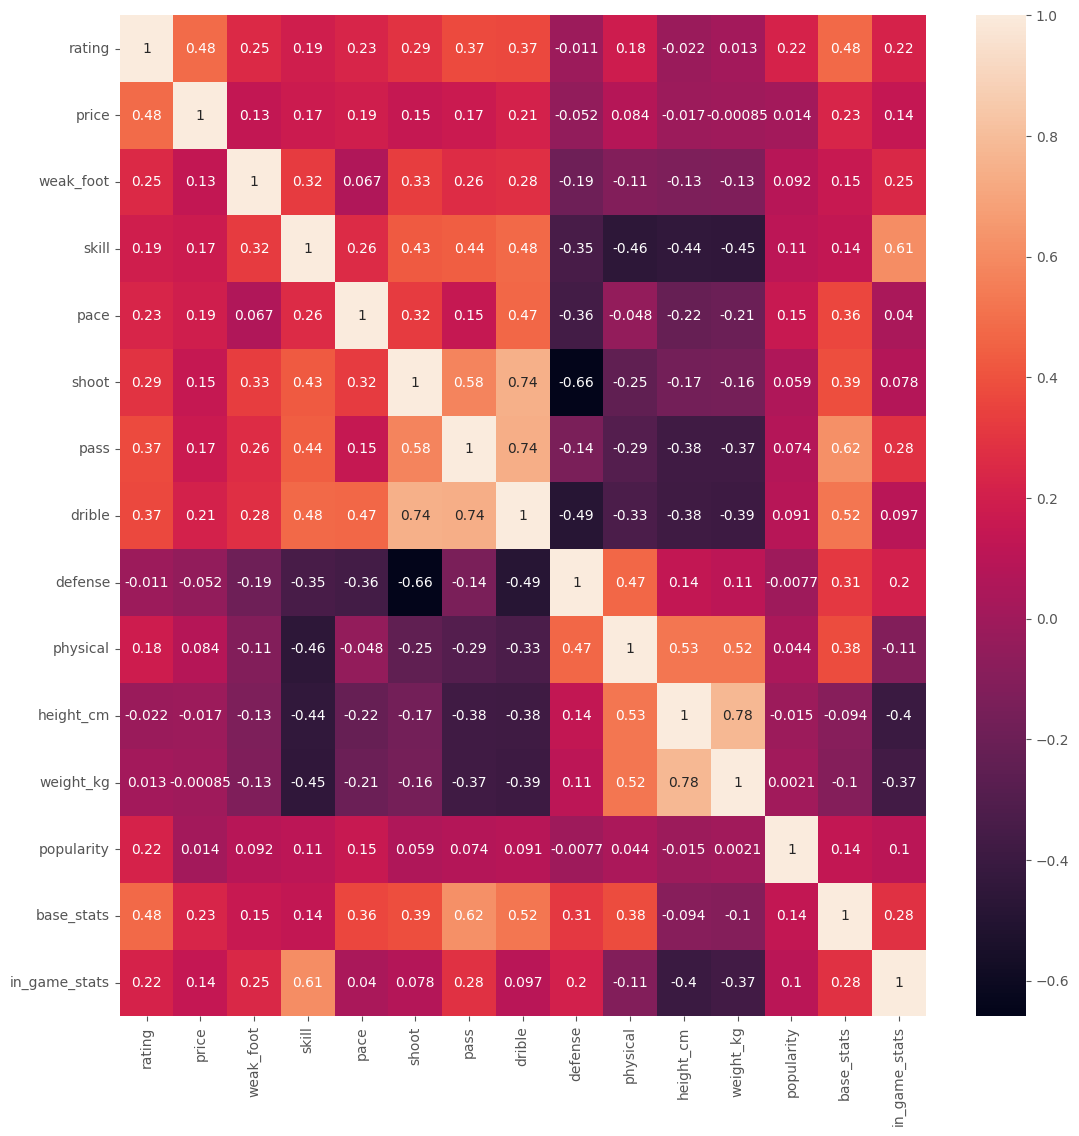

<IPython.core.display.Javascript object>

In [61]:
df_corr = df_top_league_players[['rating','price', 'weak_foot', 'skill', 
                                 'pace', 'shoot', 'pass', 'drible', 'defense', 'physical', 
                                 'height_cm', 'weight_kg', 'popularity', 'base_stats','in_game_stats' ]].dropna().corr()
ax = plt.subplots(figsize=(13, 13))

ax = sns.heatmap(df_corr, annot=True)

plt.show()

In [62]:
df_top_league_players.query('price > 0')\
                    .groupby('league')['price']\
                    .agg(['mean','max', 'min', 'count'])\
                    .sort_values('mean', ascending=False)

,mean,max,min,count
league,,,,
Ligue 1,419225.187970,11400000,3700,133
MBS Pro League (SAU 1),362681.818182,3030000,18000,11
Premier League,179427.570093,5700000,2150,321
LaLiga Santander,145874.882629,2890000,3100,213
Süper Lig (TUR 1),122945.833333,1070000,3700,12
Bundesliga,106806.571429,2290000,1500,175
Serie A TIM,105093.932039,2650000,1400,206
Eredivisie,52255.000000,650000,3600,30
Major League Soccer,38108.108108,400000,3600,37


<IPython.core.display.Javascript object>

In [63]:
test = df_top_league_players[['name', 'position', 'pace']]
test

,name,position,pace
0,Lionel Messi,RW,93
1,Karim Benzema,CF,92
2,Kylian Mbappé,ST,99
3,Kevin De Bruyne,CM,85
4,Thibaut Courtois,GK,90
...,...,...,...
1316,Joan Jordán,CM,65
1317,Orkun Kökçü,CM,78
1318,John McGinn,RM,75
1319,Ludovic Ajorque,ST,80


<IPython.core.display.Javascript object>

- Fastest player by position
- Best deal (cheapest with good ingame stats)
- IMC dos jogadores
- Strongest players by position
- Overpriced by league
- More expensive league
- Fastest nation
- Expensive club
- league with players from another country

In [64]:
df_top_league_players[['name', 'position', 'pace']]\
                    .sort_values(['pace'], ascending=False)\
                    .drop_duplicates(subset='name', keep='first')\
                    .drop_duplicates(subset='position', keep='first')
                    

,name,position,pace
651,Theo Walcott,RW,99
702,Loïs Openda,ST,99
13,Achraf Hakimi,RB,99
12,Kylian Mbappé,LW,99
152,Moussa Diaby,RM,99
782,Moses Simon,LM,98
15,Theo Hernández,LB,98
652,Rodrigo Riquelme Reche,CAM,96
354,Jorge Campos,GK,95
667,Leonardo Spinazzola,LWB,95


<IPython.core.display.Javascript object>